<a href="https://colab.research.google.com/github/dindararas/Data-Science-Portfolio/blob/main/Regression/Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CROP YIELD PREDICTION**

Crop yield prediction is an important agricultural problem. The crop yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions [[1]](https://www.kaggle.com/code/aviraljain58/crop-yield-prediction/data)

In this project, I use several machine learning algorithms to predict crop yield based on air temperature, rainfall, and the amount of pesticides used for agriculture.

## **1. IMPORTING LIBRARIES**

In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Libraries for data visualization
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Libraries for model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

## **2. LOADING DATASET**

In [25]:
yield_df = pd.read_csv('/content/yield_df.csv')
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## **3. EXPLORATORY DATA ANALYSIS**

### **3.1 Check Various Crops in Dataset**

In [3]:
print(f'Number of various crops : {len(yield_df.Item.unique())}')
print(f'List of crops : {yield_df.Item.unique()}')

Number of various crops : 10
List of crops : ['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


### **3.2 Check Missing Values**

In [4]:
yield_df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

### **3.3 Check Duplicated Data**

In [5]:
yield_df.duplicated().sum()

0

### **3.3 Data Analysis**

#### **Average Yield for Each Crop**

In [6]:
crop = pd.DataFrame(yield_df.groupby(['Item'])['hg/ha_yield'].mean()).reset_index()

# make a pie chart
fig = px.pie(crop, values = 'hg/ha_yield', names = 'Item')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')

fig.update_layout(title_text = 'Crop Yield',  title_x = 0.5, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

Potatoes and cassava are produced the most every year. Potatoes and cassva are consumed as staple food by people around the world. It can be assumed that yield of potatoes and cassava can be the highest because these crops are suitable to be cultivated in many countries. In contrast, soybean has the lowest yield.

#### **Temperature Range**

In [7]:
fig = px.box(yield_df, x='Item', y='avg_temp')
fig.update_layout(title_text = 'Temperature Range')
fig.show()

Most of crops have a wide range of air temperature from low temperature to high temperature. Cassava and plaintains tend to live in hotter temperature. From the boxplot above, rice and sorghum have many outliers that lie below the IQ1. I want to check whether there is difference between crop yield among outliers and Q3-Q1.

In [8]:
def crop_yield(df, crop=str, column=str, temp1=float, temp2=float, temp3=float) :
  df2 = df.loc[df['Item'] == crop, ('Area', 'hg/ha_yield', column)] 
  cond = df2[column] <= temp1
  cond2 = df2[column] <= temp2
  cond3 = df2[column] >= temp3
  normal = df2.loc[cond2]
  normal= normal.loc[cond3]
  outliers = df2.loc[cond]

  return normal, outliers

In [9]:
normal_sorghum, outliers_sorghum = crop_yield(yield_df, 'Sorghum', 'avg_temp', 6.2, 25.98, 18.03)

In [10]:
normal_rice, outliers_rice = crop_yield(yield_df, 'Rice, paddy', 'avg_temp', 4.17, 26.21, 17.38)

In [11]:
# Make a new dataframe
data = [['Rice', 'Normal', normal_rice['hg/ha_yield'].mean()], ['Rice', 'Outliers', outliers_rice['hg/ha_yield'].mean()],
         ['Sorghum', 'Normal', normal_sorghum['hg/ha_yield'].mean()], ['Sorghum', 'Outliers', outliers_sorghum['hg/ha_yield'].mean()]]

df = pd.DataFrame(data, columns = ['Item', 'Category', 'Yield'])


# Make a bar chart
fig = px.bar(df, x='Item', y='Yield', color = 'Category', barmode = 'group')
fig.update_layout(title_text = 'Comparison of Crop Yield')
fig.show()

Air temperature greatly affects crop growth. The optimum temperature for each crop will make crop growth much better which will lead to higher crop yield. Based on the bar chart above, yields rice and sorghum living in the environment in the range of Q1 and Q3 are higher than those outliers data. We can conclude that although rice and sorghum can live in low temperature, the growth is not optimal. 

I want to know which country that outlier data is planted 

In [12]:
outliers_sorghum.Area.unique()

array(['Kazakhstan'], dtype=object)

In [13]:
outliers_rice.Area.unique()

array(['Kazakhstan'], dtype=object)

Outliers data for both sorghum and rice come from Kazakhstan

#### **Rainfall Range**

In [14]:
fig = px.box(yield_df, x='Item', y='average_rain_fall_mm_per_year')
fig.update_layout(title_text = 'Rainfall Range')
fig.show()

Rice, maize, soyben, and sweet potatoes can be planted in the environment with a wide range of rainfall (from 51 mm/year to above 3,000 mm/year). Yams need more rainfall compared to other crops which is around 1,000 - 3,000 mm/year. There are more outliers in yams, both in below Q1 and above Q3. I want to know more about this outlier data.

In [15]:
yams = yield_df.loc[yield_df['Item'] == 'Yams', ('Area', 'hg/ha_yield','average_rain_fall_mm_per_year')] 
cond = yams['average_rain_fall_mm_per_year'] <= 1186
cond2 =  yams['average_rain_fall_mm_per_year'] >= 2281
cond3 = yams['average_rain_fall_mm_per_year'] <= 1761
cond4 = yams['average_rain_fall_mm_per_year'] >= 1410
normal = yams.loc[cond3]
normal= normal.loc[cond4]
outliers1 = yams.loc[cond]
outliers2 = yams.loc[cond2]

In [16]:
# Make a new dataframe
data = [['Normal', normal['hg/ha_yield'].mean()], ['Lower rainfall', outliers1['hg/ha_yield'].mean()],
         ['Higher Rainfall', outliers2['hg/ha_yield'].mean()]]

df = pd.DataFrame(data, columns = [ 'Category', 'Yield'])


# Make a bar chart
fig = px.bar(df, x = 'Category', y='Yield', color='Category', barmode = 'group')
fig.update_layout(title_text = 'Comparison of Crop Yield')
fig.show()

Normal data (range of Q1 - Q3) and higher rainfall have similar crop yield, while crop yield lower rainfall is 30,000 hg/ha lower than other categories. 

In [17]:
outliers1.Area.unique()

array(['Burkina Faso', 'Kenya', 'Mali', 'Mauritania', 'Portugal'],
      dtype=object)

In [18]:
outliers2.Area.unique()

array(['Colombia', 'Guyana', 'Papua New Guinea'], dtype=object)

It can be seen that most of outlier (lower rainfall) happened in African countries (Kenya, Mali, and Mauritania). African continent is semi-arid and hence prone to low rainfall and extreme drought. Meanwhile, Colombia and Guyana have a wet tropical climate. Thus outlier data (higher rainfall) happened in those two countries.

#### **The Amount of Pesticide**

In [19]:
fig = px.box(yield_df, x='Item', y='pesticides_tonnes')
fig.update_layout(title_text = 'The Amount of Pesticide')
fig.show()

It can be seen that many outliers data in all the crops. It might be happened because there is difference in the amount of pesticide allowed by every country throughout years. 

## **4. DATA PREPROCESSING**

In [26]:
# remove unnecessary columns
yield_df = yield_df.drop(['Unnamed: 0', 'Year', 'Area'], axis = 1)

# rename columns
yield_df.columns = ([ 'Crop', 'Yield', 'RRavg', 'Pesticides', 'Tavg'])
yield_df.head()

,Crop,Yield,RRavg,Pesticides,Tavg
0,Maize,36613,1485.0,121.0,16.37
1,Potatoes,66667,1485.0,121.0,16.37
2,"Rice, paddy",23333,1485.0,121.0,16.37
3,Sorghum,12500,1485.0,121.0,16.37
4,Soybeans,7000,1485.0,121.0,16.37


### **4.1 Encoding**

In [27]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Crop'], prefix = ['Crop'])
yield_df_onehot.head()

,Yield,RRavg,Pesticides,Tavg,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,36613,1485.0,121.0,16.37,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,0,0,0,0,0,0,1,0,0,0


### **4.2 Train-Test Split**

In [28]:
# Feature selection
X = yield_df_onehot.drop('Yield', axis=1)
y = yield_df_onehot['Yield']

# train-test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3)

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (19769, 13)
Shape of X_test : (8473, 13)
Shape of y_train : (19769,)
Shape of y_test : (8473,)


### **4.3 Feature Scaling**

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5. BUILDING MODEL**

In [30]:
# Function to build a model
def model_building(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test =  y_test ) :
  model.fit(X_train, y_train)
  test_pred = model.predict(X_test)
  train_pred = model.predict(X_train)
  return train_pred, test_pred

# Function for model evaluation
def model_eval(y_pred, y_actual, X, yield_df_onehot = yield_df_onehot ) :
  test_df=pd.DataFrame(X,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Yield'].columns) 
  crop=test_df[[col for col in test_df.columns if 'Crop' in col]].stack()[test_df[[col for col in test_df.columns if 'Crop' in col]].stack()>0]
  croplist=list(pd.DataFrame(crop).index.get_level_values(1))
  crops=[i.split("_")[1] for i in croplist]
  test_df.drop([col for col in test_df.columns if 'Crop' in col],axis=1,inplace=True)
  test_df['Crop']= crops

  test_df['yield_predicted']= y_pred
  test_df['yield_actual']=pd.DataFrame(y_actual)['Yield'].tolist()
  test_group=test_df.groupby('Crop')
  return test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

def model_eval_overall(train_pred, test_pred, train_actual = y_train, test_actual = y_test, X_train=X_train, X_test = X_test) :
  r2_train = r2_score(train_actual, train_pred)
  r2_test = r2_score(test_actual, test_pred)
  adjusted_train = 1 - (1-r2_train)*(len(train_actual)-1)/(len(train_actual)-X_train.shape[1]-1)
  adjusted_test = 1 - (1-r2_test)*(len(test_actual)-1)/(len(test_actual)-X_test.shape[1]-1)
  print('Training R2 Score : {:.2f}'.format(r2_train))
  print('Testing R2 Score : {:.2f}'.format(r2_test))
  print('Training Adjusted R2 Score : {:.2f}'.format(adjusted_train))
  print('Testing Adjusted R2 Score : {:.2f}'.format(adjusted_test))

#### **Linear Regression**

In [31]:
linear = LinearRegression()
train_predlin , test_predlin = model_building(linear)

In [32]:
model_eval(train_predlin, y_train, X_train)

Crop
Cassava                -0.036414
Maize                   0.279958
Plantains and others   -0.015192
Potatoes                0.117914
Rice, paddy             0.012032
Sorghum                 0.019549
Soybeans               -2.259061
Sweet potatoes          0.126513
Wheat                  -0.100505
Yams                    0.066946
dtype: float64

In [33]:
model_eval(test_predlin, y_test, X_test)

Crop
Cassava                -0.031467
Maize                   0.279494
Plantains and others   -0.008504
Potatoes                0.120384
Rice, paddy            -0.010124
Sorghum                -0.035480
Soybeans               -2.044672
Sweet potatoes          0.133589
Wheat                  -0.014523
Yams                    0.067394
dtype: float64

In [34]:
model_eval_overall(train_predlin, test_predlin)

Training R2 Score : 0.64
Testing R2 Score : 0.64
Training Adjusted R2 Score : 0.64
Testing Adjusted R2 Score : 0.64


Overall, training and testing scores have similar values, it indicates that Linear Regression doesn't overfit the data. However, if we see R2 score for each crop, there are many negative R2 scores. It can be happened when chosen model fits worsen than a horizontal line.

#### **Random Forest**

In [35]:
rf = RandomForestRegressor()
train_predrf , test_predrf = model_building(rf)

In [36]:
model_eval(train_predrf, y_train, X_train)

Crop
Cassava                 0.990697
Maize                   0.987840
Plantains and others    0.963718
Potatoes                0.990118
Rice, paddy             0.988505
Sorghum                 0.975217
Soybeans                0.985667
Sweet potatoes          0.985782
Wheat                   0.992091
Yams                    0.988025
dtype: float64

In [37]:
model_eval(test_predrf, y_test, X_test)

Crop
Cassava                 0.953051
Maize                   0.922284
Plantains and others    0.857973
Potatoes                0.919048
Rice, paddy             0.925197
Sorghum                 0.889096
Soybeans                0.888667
Sweet potatoes          0.913410
Wheat                   0.956940
Yams                    0.876577
dtype: float64

In [38]:
model_eval_overall(train_predrf, test_predrf)

Training R2 Score : 1.00
Testing R2 Score : 0.97
Training Adjusted R2 Score : 1.00
Testing Adjusted R2 Score : 0.97


Random Forest has better perfomance and there's no overfitting in this model.

#### **Gradient Boosting**

In [39]:
gb = GradientBoostingRegressor()
train_predgb , test_predgb = model_building(gb)

In [40]:
model_eval(train_predgb, y_train, X_train)

Crop
Cassava                 0.583063
Maize                   0.445631
Plantains and others    0.459970
Potatoes                0.647001
Rice, paddy             0.515444
Sorghum                 0.472247
Soybeans               -0.275436
Sweet potatoes          0.477553
Wheat                   0.560876
Yams                    0.766596
dtype: float64

In [41]:
model_eval(test_predgb, y_test, X_test)

Crop
Cassava                 0.592916
Maize                   0.443271
Plantains and others    0.394783
Potatoes                0.629033
Rice, paddy             0.497232
Sorghum                 0.489646
Soybeans               -0.204929
Sweet potatoes          0.473577
Wheat                   0.514925
Yams                    0.690748
dtype: float64

In [42]:
model_eval_overall(train_predgb, test_predgb)

Training R2 Score : 0.84
Testing R2 Score : 0.83
Training Adjusted R2 Score : 0.84
Testing Adjusted R2 Score : 0.83


Overall, Gradient Boosting has very good R2 and adjusted R2 scores. But, if we look at the R2 score for each crop, there are several negative R2 scores.

#### **SVM Regressor**

In [43]:
svr = SVR()
train_predsvr , test_predsvr = model_building(svr)

In [44]:
model_eval(train_predsvr, y_train, X_train)

Crop
Cassava                -1.519614
Maize                   0.007010
Plantains and others   -0.911572
Potatoes               -2.912865
Rice, paddy            -0.009778
Sorghum                -1.556967
Soybeans               -7.501540
Sweet potatoes         -1.291361
Wheat                  -0.188147
Yams                   -1.815316
dtype: float64

In [45]:
model_eval(test_predsvr, y_test, X_test)

Crop
Cassava                -1.542721
Maize                  -0.001611
Plantains and others   -0.790560
Potatoes               -2.940937
Rice, paddy             0.001325
Sorghum                -1.705124
Soybeans               -7.560104
Sweet potatoes         -1.291342
Wheat                  -0.170241
Yams                   -2.149073
dtype: float64

In [46]:
model_eval_overall(train_predsvr, test_predsvr)

Training R2 Score : -0.19
Testing R2 Score : -0.19
Training Adjusted R2 Score : -0.19
Testing Adjusted R2 Score : -0.19


#### **Plot Actual vs Predicted Values**

It can be seen that Random Forest has the best performance than other models. I will plot the actual values against the predicted ones by using the Random Forest.

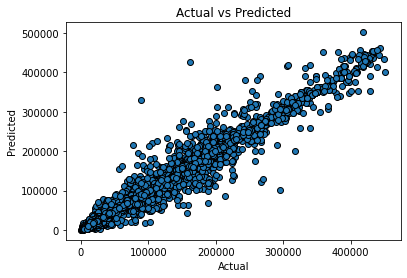

In [52]:
# So let's run the model actual values against the predicted ones 
test_df = pd.DataFrame(X_test,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Yield'].columns)
test_df['Predicted'] = test_predrf
test_df['Actual'] = pd.DataFrame(y_test)['Yield'].tolist()


fig, ax = plt.subplots() 

ax.scatter(test_df['Predicted'], test_df['Actual'],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()